(-0.5, 1919.5, 2559.5, -0.5)

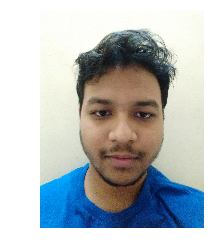

In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
#import pandas as pd
from PIL import Image


img = Image.open(r'C:\Users\user\Desktop\Abhilash\Imp\Deep_Learning\Neural Networks\Recognize\Images\t1.jpg')
#img = img.crop((1,1,50,100))
#img.save(r'C:\Users\user\Desktop\Abhilash\Imp\Deep_Learning\Neural Networks\Recog_me\tmod.jpg')
plt.imshow(img)
plt.axis('off')

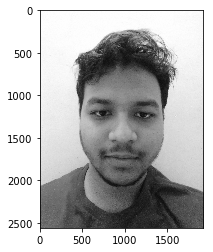

In [3]:
imgN = img.convert('LA')
plt.imshow(imgN)

In [ ]:
#-------------Working with a single Image-------------

In [4]:
dat = np.array(img.getdata())
datN = np.array(imgN.getdata())

In [5]:
def convert_gscale(datN):
    data = np.empty([datN.shape[0]])
    for i in range(0,datN.shape[0]):
        data[i] = np.average(datN[i])
    #print(data.shape)
    return data

In [6]:
print(dat.shape)
print(datN.shape)

(4915200, 3)
(4915200, 2)


In [7]:
data = convert_gscale(datN)

In [8]:
data.shape
data = data.reshape(1920,2560)

In [9]:
#-----------------components of original image----------


r = dat[:,0] #r - component
g = dat[:,1] #g - component
b = dat[:,2] #b - component
print(r,g,b)
#Y_gray = 0.299*r + 0.587*g + 0.114*b
#print(Y_gray)
#Y_gray.shape

[251 253 255 ...,   0   0   6] [250 252 255 ..., 104 106 112] [248 250 253 ..., 178 180 186]


In [10]:
r.shape, type(r)

((4915200,), numpy.ndarray)

In [11]:
r = r.reshape(1920, 2560)
g = g.reshape(1920, 2560)
b = b.reshape(1920, 2560)
print(r.shape,g.shape,b.shape)
#---------------------------------------------

(1920, 2560) (1920, 2560) (1920, 2560)


In [12]:
dat = dat.reshape(1920,2560,3)
data = data.reshape(1920,2560)
print(dat.shape)
print(data.shape)

(1920, 2560, 3)
(1920, 2560)


In [ ]:
#-------------------Done! preprocessing a single image. Now for the whole dataset-----------------

In [13]:
#--------load all the images--------------------
features = np.ones([24,1920,2560])
#print(features,features.shape)
#print(data.shape)
#features = np.append(features,data)
#features[0] = data# = np.append(features,data)
#print(features,features.shape)

In [ ]:
for i in range(1,25):
    img = Image.open(r'C:\Users\user\Desktop\Abhilash\Imp\Deep_Learning\Neural Networks\Recognize\Images\t'+str(i)+'.jpg')
    img = img.convert('LA')
    dat1 = np.array(img.getdata())
    dat1 = convert_gscale(dat1)
    dat1 = dat1.reshape(1920,2560)
    features[i] = dat1

In [15]:
features.shape

(24, 1920, 2560)

In [16]:
features

array([[[   1. ,    1. ,    1. , ...,    1. ,    1. ,    1. ],
        [   1. ,    1. ,    1. , ...,    1. ,    1. ,    1. ],
        [   1. ,    1. ,    1. , ...,    1. ,    1. ,    1. ],
        ..., 
        [   1. ,    1. ,    1. , ...,    1. ,    1. ,    1. ],
        [   1. ,    1. ,    1. , ...,    1. ,    1. ,    1. ],
        [   1. ,    1. ,    1. , ...,    1. ,    1. ,    1. ]],

       [[ 252.5,  253.5,  254.5, ...,  253.5,  254. ,  254.5],
        [ 253. ,  253. ,  253.5, ...,  254.5,  254.5,  254.5],
        [ 254.5,  254.5,  254.5, ...,  253. ,  252.5,  252. ],
        ..., 
        [ 171. ,  175.5,  180.5, ...,  173. ,  167. ,  163.5],
        [ 163. ,  165.5,  165. , ...,  144. ,  141.5,  146.5],
        [ 144.5,  148.5,  144.5, ...,  168. ,  168.5,  171.5]],

       [[ 255. ,  255. ,  255. , ...,  255. ,  255. ,  255. ],
        [ 255. ,  255. ,  255. , ...,  255. ,  255. ,  255. ],
        [ 255. ,  255. ,  255. , ...,  254.5,  254.5,  254.5],
        ..., 
        [

In [17]:
import pandas as pd

labels = pd.read_excel(r'C:\Users\user\Desktop\Abhilash\Imp\Deep_Learning\Neural Networks\Recognize\labels_train.xlsx')
print(labels,labels.shape)

   emotion
0      sad
1    smile
2    smile
3    happy
4    happy
5    smile
6    smile
7      sad
8      sad
9     cool
10     sad
11     sad
12     sad
13     sad
14   smile
15    cool
16   happy
17     sad
18     sad
19   smile
20   smile
21   happy
22   happy
23     sad (24, 1)


In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

def label_encode(labels):
    enc = LabelEncoder()
    labels = enc.fit_transform(labels)
    return labels

#print(labels)
def one_hot_encode(labels):
    enc = OneHotEncoder(sparse = False)
    labels = labels.reshape(len(labels), 1)
    labels = enc.fit_transform(labels)#.toarray()
    return labels

labels = label_encode(labels)
print(labels)
labels = one_hot_encode(labels)
print(labels)

[2 3 3 1 1 3 3 2 2 0 2 2 2 2 3 0 1 2 2 3 3 1 1 2]
[[ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  0.  1.]
 [ 0.  1.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  1.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]
 [ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  0.  1.]
 [ 0.  1.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]]


C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
labels

array([[ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.]])

In [20]:
labels.shape

(24, 4)

In [38]:
# the cnn model
def create_model():
    from keras.models import Sequential
    from keras.layers import Dense, MaxPool2D, BatchNormalization, Dropout , Conv2D, Flatten
    from keras import optimizers

    model = Sequential()
    model.add(Conv2D(filters = 16, kernel_size = (5, 5), activation='relu', input_shape = (1920, 2560, 1)))
    
    model.add(BatchNormalization())
    
    model.add(Conv2D(filters = 16, kernel_size = (5, 5), activation='relu'))
    model.add(BatchNormalization())
    
    model.add(MaxPool2D(strides = (4,4)))
    model.add(Dropout(0.6))
    
    model.add(Conv2D(filters = 8, kernel_size = (5, 5), activation='relu'))
    model.add(BatchNormalization())

    model.add(Conv2D(filters = 8, kernel_size = (5, 5), activation='relu'))    
    model.add(BatchNormalization())    

    model.add(MaxPool2D(strides = (4,4)))
    model.add(Dropout(0.60))

    model.add(Flatten())
    model.add(Dense(1024, activation = 'relu'))
    model.add(Dropout(0.15))
    model.add(Dense(512, activation = 'relu'))
    model.add(Dropout(0.10))
    model.add(Dense(256, activation = 'relu'))
    model.add(Dropout(0.10))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.10))
    model.add(Dense(32, activation = 'relu'))
    model.add(Dropout(0.10))
    model.add(Dense(4, activation = 'softmax'))
    return model


In [39]:
model = create_model()
print(model)

In [40]:
from keras import optimizers

In [41]:
#fitting the model with the features and labels
sgd = optimizers.SGD(lr = 0.004)
model.compile(loss = 'categorical_crossentropy', optimizer = sgd)
model.fit(features,labels)

ValueError: Error when checking input: expected conv2d_15_input to have 4 dimensions, but got array with shape (24, 1920, 2560)